In [5]:
import marvin
marvin.config.download = True
marvin.config.release = 'DR17'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from marvin.tools.vacs import VACs
from astropy.io import fits

from marvin import config #Needed to fix "Cube not subscriptable" when running in Sciserver
config.forceDbOff() #Needed to fix "Cube not subscriptable" when running in Sciserver

print('Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned')

Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned


In [37]:
pipe3d = 'https://data.sdss.org/sas/dr17/manga/spectro/pipe3d/v3_1_1/3.1.1/8989/manga-8989-1902.Pipe3D.cube.fits.gz'
#to get a pipe3D fits file for a specific galaxy change the number after 3.1.1. to the MaNGA plate number and the numbers after manga- with the plateifu value
hdu=fits.open(pipe3d)
mass=hdu[1].data[19]
mangaid = '1-150254' #MaNGA ID of the galaxy
maps = marvin.tools.Maps(mangaid)
data = maps.vacs.gz3d

In [9]:
style = {
    'lines.linewidth': 1.5,
    'font.size': 16.0,
    'axes.linewidth': 1.5,
    'axes.titlesize': 'large',
    'axes.labelsize': 'large',
    'xtick.major.size': 6,
    'xtick.minor.size': 4,
    'xtick.major.width': 1.5,
    'xtick.minor.width': 1.5,
    'xtick.major.pad': 6,
    'xtick.minor.pad': 6,
    'xtick.labelsize': 'medium',
    'ytick.major.size': 6,
    'ytick.minor.size': 4,
    'ytick.major.width': 1.5,
    'ytick.minor.width': 1.5,
    'ytick.major.pad': 6,
    'ytick.minor.pad': 6,
    'ytick.labelsize': 'medium',
    'legend.fancybox': True,
    'legend.fontsize': 'small',
    'legend.scatterpoints': 5,
    'legend.loc': 'best',
    'figure.titlesize': 'large',
}

plt.style.use(style)

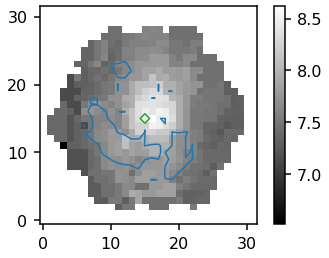

In [39]:
# Overlaying the masks as contours on the stellar mass map
ax = plt.subplot()
plt.imshow(mass,cmap='gray')
ax.set_ylim(*ax.get_ylim()[::-1])
plt.colorbar()
ax.contour(data.spiral_mask_spaxel, levels=[4], zorder=20, colors='C0')
ax.contour(data.center_mask_spaxel, levels=[4], zorder=20, colors='C2')